In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

Steps involved :
1. Understand the data
2. Preprocess the data
3. Create a data
4. Fit the model
5. Evaluate
6. Adjust different hyperparameters and improve the model.
7. Repeat until satisfied


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2023-08-10 19:18:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.143.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.5MB/s    in 13s     

2023-08-10 19:19:13 (37.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

#Walkthrough the 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
#get the classnames from the dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


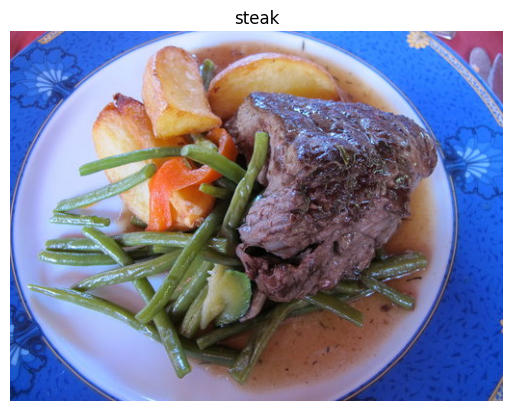

In [7]:
#view any random image from the dataset
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

Preprocessing the data

In [8]:
img

array([[[165,  70, 110],
        [161,  66, 106],
        [159,  64, 104],
        ...,
        [153,  57,  95],
        [152,  56,  94],
        [151,  55,  93]],

       [[163,  68, 108],
        [161,  66, 106],
        [161,  64, 105],
        ...,
        [154,  58,  96],
        [153,  57,  95],
        [152,  56,  94]],

       [[160,  66, 103],
        [160,  66, 103],
        [162,  66, 104],
        ...,
        [154,  60,  97],
        [153,  59,  96],
        [152,  58,  95]],

       ...,

       [[  5,  35, 108],
        [  9,  38, 116],
        [ 13,  46, 127],
        ...,
        [106, 115, 174],
        [ 91,  90, 160],
        [103,  95, 172]],

       [[ 10,  45, 126],
        [ 13,  48, 132],
        [ 18,  55, 146],
        ...,
        [130, 136, 170],
        [118, 113, 154],
        [118, 109, 156]],

       [[ 23,  59, 145],
        [ 21,  58, 147],
        [ 21,  59, 158],
        ...,
        [137, 141, 152],
        [127, 123, 138],
        [124, 115, 134]]

In [9]:
# check the shape for width, height and color channels
img.shape

(384, 512, 3)

In [10]:
# get all pixel values between 0 and 1
img/255.

array([[[0.64705882, 0.2745098 , 0.43137255],
        [0.63137255, 0.25882353, 0.41568627],
        [0.62352941, 0.25098039, 0.40784314],
        ...,
        [0.6       , 0.22352941, 0.37254902],
        [0.59607843, 0.21960784, 0.36862745],
        [0.59215686, 0.21568627, 0.36470588]],

       [[0.63921569, 0.26666667, 0.42352941],
        [0.63137255, 0.25882353, 0.41568627],
        [0.63137255, 0.25098039, 0.41176471],
        ...,
        [0.60392157, 0.22745098, 0.37647059],
        [0.6       , 0.22352941, 0.37254902],
        [0.59607843, 0.21960784, 0.36862745]],

       [[0.62745098, 0.25882353, 0.40392157],
        [0.62745098, 0.25882353, 0.40392157],
        [0.63529412, 0.25882353, 0.40784314],
        ...,
        [0.60392157, 0.23529412, 0.38039216],
        [0.6       , 0.23137255, 0.37647059],
        [0.59607843, 0.22745098, 0.37254902]],

       ...,

       [[0.01960784, 0.1372549 , 0.42352941],
        [0.03529412, 0.14901961, 0.45490196],
        [0.05098039, 0

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#rescale
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

#Load data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') #since we have 10 classes, and use softmax since we have more than 2 classes
])

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [13]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 143ms/step - loss: 2.1899 - accuracy: 0.1911 - val_loss: 1.9905 - val_accuracy: 0.2852
Epoch 2/5
235/235 [==============================] - 30s 127ms/step - loss: 1.9117 - accuracy: 0.3449 - val_loss: 1.8945 - val_accuracy: 0.3252
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.6094 - accuracy: 0.4604 - val_loss: 1.9107 - val_accuracy: 0.3408
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 1.1225 - accuracy: 0.6303 - val_loss: 2.1998 - val_accuracy: 0.3144
Epoch 5/5
235/235 [==============================] - 29s 125ms/step - loss: 0.5623 - accuracy: 0.8208 - val_loss: 2.8155 - val_accuracy: 0.3104


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [15]:
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,2.189858,0.191067,1.990480,0.2852
1,1.911715,0.344933,1.894508,0.3252
2,1.609443,0.460400,1.910687,0.3408
3,1.122487,0.630267,2.199788,0.3144
4,0.562349,0.820800,2.815536,0.3104


In [16]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label ='validation_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

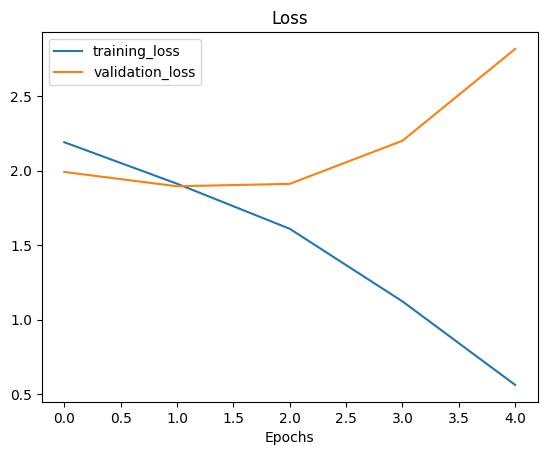

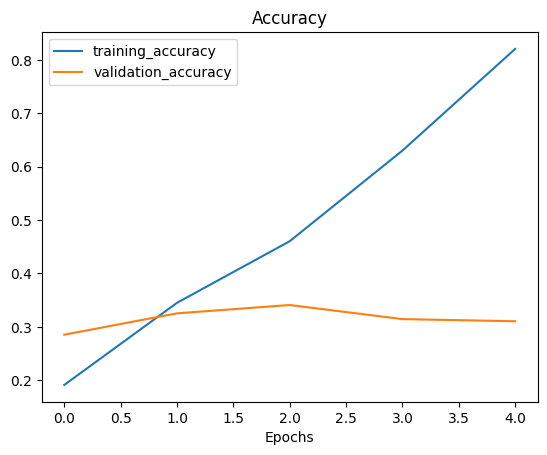

In [17]:
plot_loss_curve(history_1)

In [18]:
# the model doesn't work well, the loss curve is supposed to go down, and accuracy go up. Its overfitting itself and performs poorly on the test dataset
model_1.evaluate(test_data)

79/79 [==============================] - 8s 95ms/step - loss: 2.8155 - accuracy: 0.3104


[2.8155369758605957, 0.31040000915527344]

In [19]:
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [20]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 123ms/step - loss: 2.0644 - accuracy: 0.2656 - val_loss: 1.9203 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 29s 125ms/step - loss: 1.7334 - accuracy: 0.4087 - val_loss: 1.8636 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 28s 121ms/step - loss: 1.3520 - accuracy: 0.5536 - val_loss: 1.9690 - val_accuracy: 0.3384
Epoch 4/5
235/235 [==============================] - 28s 121ms/step - loss: 0.9161 - accuracy: 0.7139 - val_loss: 2.2109 - val_accuracy: 0.3168
Epoch 5/5
235/235 [==============================] - 33s 138ms/step - loss: 0.5142 - accuracy: 0.8528 - val_loss: 2.7821 - val_accuracy: 0.2916


In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [22]:
pd.DataFrame(history_2.history)

,loss,accuracy,val_loss,val_accuracy
0,2.064403,0.265600,1.920310,0.3220
1,1.733433,0.408667,1.863572,0.3416
2,1.352050,0.553600,1.969025,0.3384
3,0.916140,0.713867,2.210862,0.3168
4,0.514225,0.852800,2.782064,0.2916


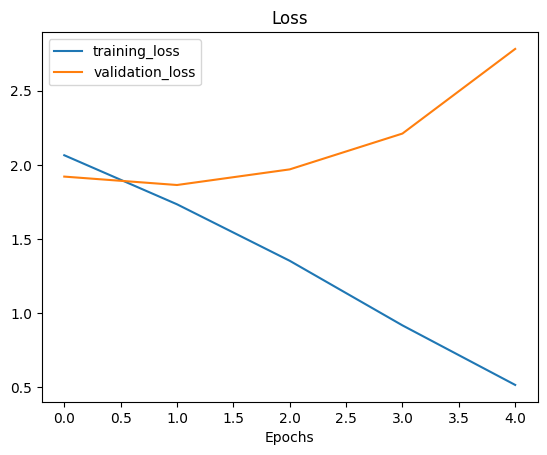

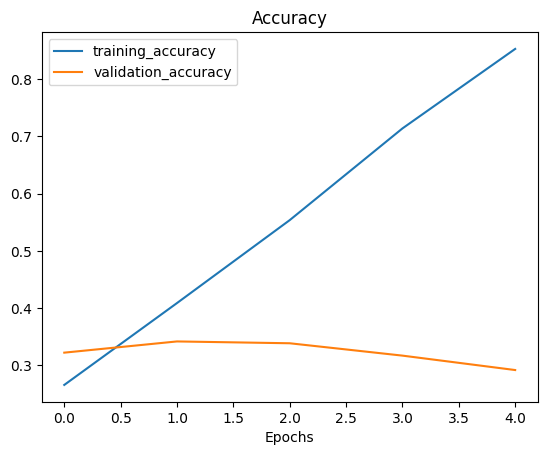

In [23]:
plot_loss_curve(history_2)

In [24]:
# still not that great
model_2.evaluate(test_data)

79/79 [==============================] - 7s 87ms/step - loss: 2.7821 - accuracy: 0.2916


[2.7820639610290527, 0.29159998893737793]

Try augmenting the datasets to check and see if that improves the accuracy

In [25]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [26]:
model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [27]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 106s 443ms/step - loss: 2.1919 - accuracy: 0.1884 - val_loss: 2.0477 - val_accuracy: 0.2676
Epoch 2/5
235/235 [==============================] - 109s 462ms/step - loss: 2.0798 - accuracy: 0.2571 - val_loss: 1.9537 - val_accuracy: 0.3044
Epoch 3/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0271 - accuracy: 0.2816 - val_loss: 1.8656 - val_accuracy: 0.3560
Epoch 4/5
235/235 [==============================] - 112s 478ms/step - loss: 1.9925 - accuracy: 0.2963 - val_loss: 1.8460 - val_accuracy: 0.3572
Epoch 5/5
235/235 [==============================] - 111s 474ms/step - loss: 1.9471 - accuracy: 0.3311 - val_loss: 1.8394 - val_accuracy: 0.3668


In [28]:
pd.DataFrame(history_3.history)

,loss,accuracy,val_loss,val_accuracy
0,2.191908,0.188400,2.047718,0.2676
1,2.079756,0.257067,1.953661,0.3044
2,2.027089,0.281600,1.865636,0.3560
3,1.992451,0.296267,1.846006,0.3572
4,1.947082,0.331067,1.839393,0.3668


In [29]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

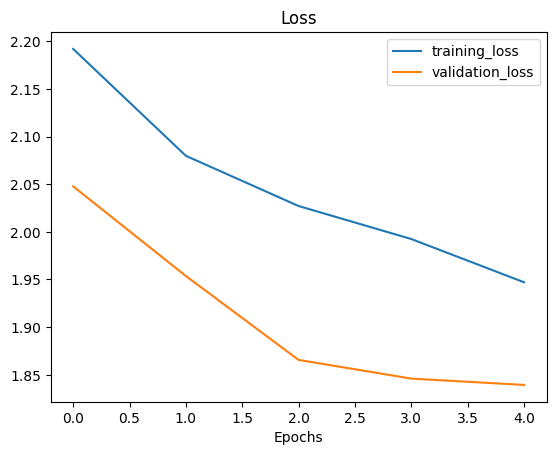

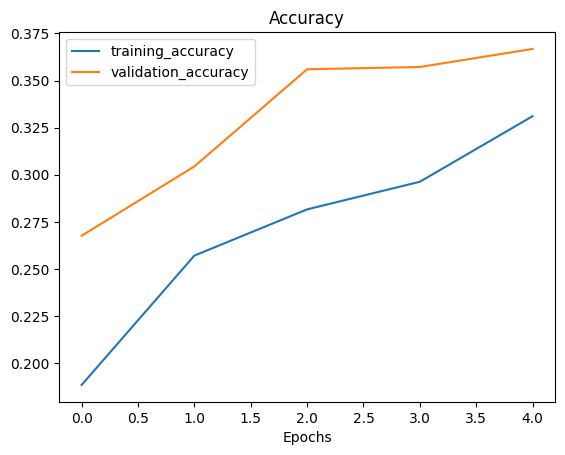

In [30]:
plot_loss_curve(history_3)

In [31]:
model_3.evaluate(test_data)

79/79 [==============================] - 8s 97ms/step - loss: 1.8394 - accuracy: 0.3668


[1.8393921852111816, 0.3668000102043152]